In [1]:
# Подключаем нужные библиотеки 
import matplotlib.pyplot as plt
from hcp_utils import mmp
import glob
import numpy as np
import networkx as nx

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
# Импортируем обучающие и тестовые данные
import paths

list_folders_mean_train = [paths.folders_mean_ensemble_edges_train_wm, paths.folders_mean_ensemble_edges_train_gambling,
                            paths.folders_mean_ensemble_edges_train_motor, paths.folders_mean_ensemble_edges_train_language,
                            paths.folders_mean_ensemble_edges_train_social, paths.folders_mean_ensemble_edges_train_relational,
                            paths.folders_mean_ensemble_edges_train_emotion]

list_folders_mean_test = [paths.folders_mean_ensemble_edges_test_wm, paths.folders_mean_ensemble_edges_test_gambling,
                            paths.folders_mean_ensemble_edges_test_motor, paths.folders_mean_ensemble_edges_test_language,
                            paths.folders_mean_ensemble_edges_test_social, paths.folders_mean_ensemble_edges_test_relational,
                            paths.folders_mean_ensemble_edges_test_emotion]

In [2]:
def id_to_name(ids):
    """
    Сопоставление индексам регионов их сокращенных названий.
     
    :param ids: Список чисел от 0 до 378.
    :return: Список сокращенных названий. 
    """
    return [mmp.labels[id + 1] for id in ids]

id_to_name([0, 1, 2])

['L_V1', 'L_MST', 'L_V6']

Идея следующая: 
1. Определяем интересную характеристику 
2. Вычисляем ее среднее и дисперсию
3. Делаем визуализации 
4. Проводим классификацию с 4мя фолдами
5. Проводим статистический тест 
6. Смотрим топ n вершин и интерпретируем их с помощью литературы 

In [3]:
# Функция чтения сетей
def read_nets_files(folders_test):
    states_0 = ['0bk', 'win', 'l', 'story', 'rnd', 'relation', 'neut']
    states_1 = ['2bk', 'loss', 'r', 'math', 'mental', 'match', 'fear']
    
    files = sorted(glob.glob(f'{folders_test[0]}/*') + glob.glob(f'{folders_test[1]}/*') +
                   glob.glob(f'{folders_test[2]}/*') + glob.glob(f'{folders_test[3]}/*'))
    files_0 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_0)]
    files_1 = [file for file in files if any('_' + sub + '.npy' in file.split('/')[-1] for sub in states_1)]
    
    # if not shift and not reflect: # Читать как есть, от -1 до 1
    #     Gs_0 = [nx.from_numpy_array(np.load(file)) for file in files_0]
    #     Gs_1 = [nx.from_numpy_array(np.load(file)) for file in files_1]   
    # elif shift and not reflect: # Читать со сдвигом, от 0 до 1
    #     Gs_0 = [nx.from_numpy_array((1 + np.load(file)) / 2) for file in files_0]
    #     Gs_1 = [nx.from_numpy_array((1 + np.load(file)) / 2) for file in files_1]
    # elif shift and reflect: # Читать со сдвигом, от 0 до 1, и переворачивая нулевой класс  
    #     Gs_0 = [1 - nx.from_numpy_array((1 + np.load(file)) / 2) for file in files_0]
    #     Gs_1 = [nx.from_numpy_array((1 + np.load(file)) / 2) for file in files_1]
    
    return [files_0, files_1]

# Нормализованная взвешенная степень вершин

In [34]:
files_0, files_1 = read_nets_files(paths.folders_mean_ensemble_edges_test_wm)
 

[0.27591219679604,
 0.4192507520728781,
 0.34150516455634883,
 0.32082525634584363,
 0.34757356337315753,
 0.3001787291185662,
 0.387202417174503,
 0.2010969104890988,
 0.3020236438342211,
 0.1214447158168876,
 0.2162732131208744,
 0.11892444979791685,
 0.2188906472633505,
 0.467077696491875,
 0.2946606370682765,
 0.3249415597656199,
 0.32619537272808014,
 0.39139947799945124,
 0.19600817826927375,
 0.4830015143424749,
 0.5075295707107067,
 0.42683803383999364,
 0.368544037348563,
 0.46057605039001687,
 0.2946917129365231,
 0.43469192990999944,
 0.3520579599195331,
 0.38549348385353305,
 0.02427240679448186,
 0.35682406281211126,
 0.5145564411818434,
 0.4104867733873703,
 0.33992918574954417,
 0.3364014826801355,
 0.3274085068859336,
 0.29833320741578107,
 0.3037690172722656,
 0.38610130846058605,
 0.4327161367268444,
 0.3106182429464636,
 0.29582373065500445,
 0.40672462287106265,
 0.25819245014671005,
 0.14493427773434328,
 0.22076781395147743,
 0.05001316678702365,
 0.21650380474312

In [27]:
files_0, files_1 = read_nets_files(paths.folders_mean_ensemble_edges_test_wm)

tmp1 = [nx.from_numpy_array((1 + np.load(file)) / 2).degree(weight='weight') for file in files_0[:20]] 
print(1)

KeyboardInterrupt: 

0
1
2
3
4


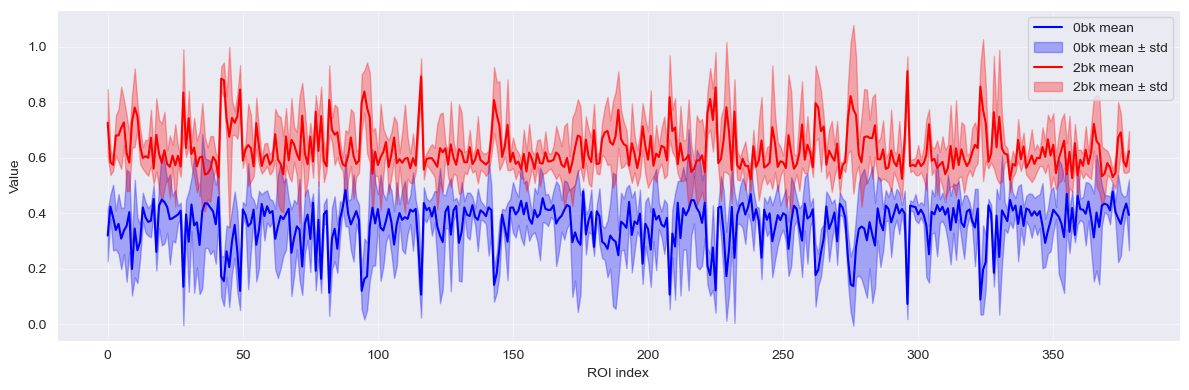

In [19]:
def degree_plot(folders_test, shift, reflect):
    files_0, files_1 = read_nets_files(folders_test)
    
    degrees_0 = []
    degrees_1 = []
    for count, (file_0, file_1) in enumerate(zip(files_0[:5], files_1[:5])):
        deg_0 = [d / 378 for n, d in nx.from_numpy_array((1 + np.load(file_0)) / 2).degree(weight='weight')]
        deg_1 = [d / 378 for n, d in nx.from_numpy_array((1 + np.load(file_1)) / 2).degree(weight='weight')]
        degrees_0.append(deg_0)
        degrees_1.append(deg_1)
        print(count)
        
    mean_degrees_0 = np.mean(np.array(degrees_0), axis=0)
    mean_degrees_1 = np.mean(np.array(degrees_1), axis=0)
    std_degrees_0 = np.std(np.array(degrees_0), axis=0)
    std_degrees_1 = np.std(np.array(degrees_1), axis=0)
    
    # tmp1, tmp2 = mean_degrees_1 - std_degrees_1, mean_degrees_1 + std_degrees_1,


    # Средние значения с доверительными интервалами
    plt.figure(figsize=(12, 4), facecolor='white')
    plt.plot(mean_degrees_0, label=f'{files_0[0].split('/')[-1].split('_')[-1][:-4]} mean', color='blue', alpha=1)
    plt.fill_between(range(mean_degrees_0.shape[0]),
                     mean_degrees_0 - std_degrees_0,
                     mean_degrees_0 + std_degrees_0,
                     color='blue', alpha=0.3, label=f'{files_0[0].split('/')[-1].split('_')[-1][:-4]} mean ± std')

    plt.plot(mean_degrees_1, label=f'{files_1[0].split('/')[-1].split('_')[-1][:-4]} mean', color='red', alpha=1)
    plt.fill_between(range(mean_degrees_1.shape[0]),
                     mean_degrees_1 - std_degrees_1,
                     mean_degrees_1 + std_degrees_1,
                     color='red', alpha=0.3, label=f'{files_1[0].split('/')[-1].split('_')[-1][:-4]} mean ± std')

    # Настройки графика
    # plt.title(f'Average edge weights of vertices for {folders_mean_test[0].split("/")[-1]} {folders_mean_test[0].split("/")[3]}')
    plt.xlabel('ROI index')
    plt.ylabel('Value')
    plt.legend(loc="upper right")
    plt.grid(alpha=0.5)
    plt.tight_layout()

    # Отображение
    plt.show()
    
degree_plot(paths.folders_mean_ensemble_edges_test_wm, 1, 2)